> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset The Gun and USA Data To Investigate Characteristics and Correlations

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
## I have selected two data sets and they are us_Census_data and gun_data from the FBI gun data to explore facts differences from state to another (here we have state is the variable and index). Later on we will use data we get from us_data_census and correlate it to the gun_data.

## Our goal here is find the correlation between education, income, population, poverty, and race then relate them to firearms and people tendency to get permits and have them legally. That way it is easy to trace and control who can have it to prevent or reduce crimes lates


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
> 
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlip inline 

us_data= pd.read_csv('US_Census_Data.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
gun_data= pd.read_csv('gun_data.csv')

In [3]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun_data.shape

(12485, 27)

##### Here we find a lot of rows in the gun_data CSV as data listed for months and years.
##### Now we explore data inside, what can be useful in our investigation and what is not

In [5]:
# file looks pretty consistent 
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
State                   50 non-null object
Population_estimates    50 non-null int64
White                   50 non-null float64
Black                   50 non-null float64
American_other          50 non-null float64
Asian                   50 non-null float64
Hispanic                50 non-null float64
High_school             50 non-null float64
Bachelor_degree         50 non-null float64
Per_capita_income       50 non-null int64
Persons_in_poverty      50 non-null float64
Total_employment        50 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.8+ KB


In [6]:
# Here we have a lot of missing data but we will not need all columns so we can just drop what we don't need
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# We start with gun data, we actually will need only 7 columns and drop the rest
gun_data.drop(['month','permit_recheck','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'],axis=1,inplace=True)


In [8]:
gun_data.head()

,state,permit,handgun,long_gun,other,multiple,totals
0,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,California,57839.0,37165.0,24581.0,2984.0,0,123506


In [9]:
gun_data.shape

(12485, 7)

In [10]:
# now we explore gun data for missing values
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
state       12485 non-null object
permit      12461 non-null float64
handgun     12465 non-null float64
long_gun    12466 non-null float64
other       5500 non-null float64
multiple    12485 non-null int64
totals      12485 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 682.9+ KB


In [11]:
# We will fill N/A data with data set average values
gun_data.fillna(gun_data.mean(), inplace=True)

In [12]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
state       12485 non-null object
permit      12485 non-null float64
handgun     12485 non-null float64
long_gun    12485 non-null float64
other       12485 non-null float64
multiple    12485 non-null int64
totals      12485 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 682.9+ KB


In [13]:
# Now it looks good and move to the us_data table. The csv file has a lot of inconsistency in data types, names, so on. 
# So that we had to clean up CSV file manually because it was easier and kept a few columns in addition to transposing columns by row to be compatible with gun_data file
# Let's see how it looks now
us_data.head()

,State,Population_estimates,White,Black,American_other,Asian,Hispanic,High_school,Bachelor_degree,Per_capita_income,Persons_in_poverty,Total_employment
0,Alabama,4863300,0.69,0.27,0.01,0.01,0.04,0.84,0.24,24091,0.17,1634391
1,Alaska,741894,0.66,0.04,0.15,0.06,0.07,0.92,0.28,33413,0.10,267999
2,Arizona,6931071,0.83,0.05,0.05,0.03,0.31,0.86,0.28,25848,0.16,2295186
3,Arkansas,2988248,0.79,0.16,0.01,0.02,0.07,0.85,0.21,22798,0.17,1003113
4,California,39250017,0.73,0.07,0.02,0.15,0.39,0.82,0.31,30318,0.14,14325377


In [14]:
# Now we need to modify headers names to rename them and move spaces, uppercase, etc. to be compatable with other data table

In [15]:
us_data.columns.str.lower()

Index(['state', 'population_estimates', 'white', 'black', 'american_other',
       'asian', 'hispanic', 'high_school', 'bachelor_degree',
       'per_capita_income', 'persons_in_poverty', 'total_employment'],
      dtype='object')

In [16]:
us_data.rename(columns={'State' : 'state','Population_estimates' : 'population_estimates','White' : 'white','Black' : 'black','American_other' : 'american_other','Asian' : 'asian','Hispanic' : 'hispanic','High_school' : 'high_school','Bachelor_degree' : 'bachelor_degree','Per_capita_income' : 'per_capita_income_usd','Person_in_poverty' : 'persons_in_poverty','Total_employment' : 'total_employment'}, inplace=True)

In [17]:
us_data.head()

,state,population_estimates,white,black,american_other,asian,hispanic,high_school,bachelor_degree,per_capita_income_usd,Persons_in_poverty,total_employment
0,Alabama,4863300,0.69,0.27,0.01,0.01,0.04,0.84,0.24,24091,0.17,1634391
1,Alaska,741894,0.66,0.04,0.15,0.06,0.07,0.92,0.28,33413,0.10,267999
2,Arizona,6931071,0.83,0.05,0.05,0.03,0.31,0.86,0.28,25848,0.16,2295186
3,Arkansas,2988248,0.79,0.16,0.01,0.02,0.07,0.85,0.21,22798,0.17,1003113
4,California,39250017,0.73,0.07,0.02,0.15,0.39,0.82,0.31,30318,0.14,14325377


In [18]:
us_data.shape

(50, 12)

In [19]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
state                    50 non-null object
population_estimates     50 non-null int64
white                    50 non-null float64
black                    50 non-null float64
american_other           50 non-null float64
asian                    50 non-null float64
hispanic                 50 non-null float64
high_school              50 non-null float64
bachelor_degree          50 non-null float64
per_capita_income_usd    50 non-null int64
Persons_in_poverty       50 non-null float64
total_employment         50 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Having a general outlook on data what they serve is essential. As I have stated earlier in the introduction that I’m trying to understand demography of some states and investigate data so let’s start:
### What is the most populated state?


In [20]:
# get the state with highest population
us_data.loc[us_data['population_estimates'].idxmax()] 

state                    California
population_estimates       39250017
white                          0.73
black                          0.07
american_other                 0.02
asian                          0.15
hispanic                       0.39
high_school                    0.82
bachelor_degree                0.31
per_capita_income_usd         30318
Persons_in_poverty             0.14
total_employment           14325377
Name: 4, dtype: object

### What state is the highest average annul income per person?

In [21]:
# get highest income state
us_data.loc[us_data['per_capita_income_usd'].idxmax()] 

state                    Connecticut
population_estimates         3576452
white                           0.81
black                           0.12
american_other                  0.01
asian                           0.05
hispanic                        0.16
high_school                      0.9
bachelor_degree                 0.38
per_capita_income_usd          38803
Persons_in_poverty               0.1
total_employment             1503102
Name: 6, dtype: object

### What state is the highest in education? In terms of the percentage of people with bachelor degree and higher

In [22]:
# get the state with most higher education 
us_data.loc[us_data['bachelor_degree'].idxmax()] 

state                    Massachusetts
population_estimates           6811779
white                             0.82
black                             0.09
american_other                    0.01
asian                             0.07
hispanic                          0.12
high_school                        0.9
bachelor_degree                   0.41
per_capita_income_usd            36895
Persons_in_poverty                 0.1
total_employment               3167329
Name: 20, dtype: object

### What state has the highest poverty rate?

In [23]:
# get the state with highest poverty 
us_data.loc[us_data['Persons_in_poverty'].idxmax()] 

state                    Mississippi
population_estimates         2988726
white                           0.59
black                           0.38
american_other                  0.01
asian                           0.01
hispanic                        0.03
high_school                     0.82
bachelor_degree                 0.21
per_capita_income_usd          21057
Persons_in_poverty              0.21
total_employment              926391
Name: 23, dtype: object

##### Here we got list of states with different characteristics in terms of high income, population, education, and poverity to analyse and see their other facts then relate them to gun data we have in terms of how many firearms are there and firearms permits

##### Our list of states: California, Texas, Connecticut, Massachusetts, and Mississippi

In [24]:
# I have created set of data to extract from both tables(CSV files) by entering state name
# state is the variable here

In [25]:
state_name = "Nevada"

In [33]:
gun_data['state']=="Nevada")

30      9460
85      9035
140     8310
195    10602
Name: totals, dtype: int64

In [26]:
# Get the total number of firearms in a state
Firearms_total_number = int(sum(gun_data.totals[gun_data['state']==state_name]))

In [27]:
# Get the total number of firearms permits issues in a state
Total_number_permit = int(sum(gun_data.permit[gun_data['state']==state_name]))

In [28]:
# Get the precentage of number of permits to the total number of firearms 
Percentage_permit_total = int(sum(gun_data.permit[gun_data['state']==state_name]))/int(sum(gun_data.totals[gun_data['state']==state_name]))

In [29]:
# Get the population in a state 
pop = int(us_data.population_estimates[us_data['state']==state_name])

In [30]:
# Get the percentage of white people in a state
white=float(us_data.white[us_data['state']==state_name])

In [31]:
# Get the percentage of black people in a state
black=float(us_data.black[us_data['state']==state_name])

In [32]:
# Get the percentage of asian people in a state
asian=float(us_data.asian[us_data['state']==state_name])

In [33]:
# Get the percentage of people with high school degrees and more in a state
high_school=float(us_data.high_school[us_data['state']==state_name])

In [34]:
# Get the percentage of people with bachelor degrees and more in a state
bachelor_degree = float(us_data.bachelor_degree[us_data['state']==state_name])

In [35]:
# Get the average annual income per person in a state
annual_income_usd = float(us_data.per_capita_income_usd[us_data['state']==state_name])

In [36]:
# Get the percentage of poverty in a state
poverty = float(us_data.Persons_in_poverty[us_data['state']==state_name])

In [37]:
# The rate of firearms to population
Firearms_Population_rate=float(Firearms_total_number/pop)

In [38]:
# Print out our findings in one output
print('population = ', pop,' / Firearms_total_number = ', Firearms_total_number,' / Firearms_Population_rate = ', Firearms_Population_rate,' / permits = ', Total_number_permit,' / permits% = ', Percentage_permit_total,' / white = ', white*100,' / black= ', black*100,' / asian= ', asian*100,' / high_school= ', high_school*100,' / bachelor_degree= ', bachelor_degree*100,' / annual_income_usd= ', annual_income_usd,' / poverty= ', poverty*100)


population =  2940058  / Firearms_total_number =  1731797  / Firearms_Population_rate =  0.5890349782215181  / permits =  212922  / permits% =  0.12294859039483265  / white =  75.0  / black=  10.0  / asian=  9.0  / high_school=  85.0  / bachelor_degree=  23.0  / annual_income_usd=  26541.0  / poverty=  14.000000000000002


#### # Here I have extracted certain data such total number of firearms, firearm permits, permits percentage (to check the rate of firearm owners that have permits), populcation, races (white, black, asian), education level, average annual income per person and poverty percentage for the states (or any other state you choose)



#### We will use these datas to create a new table for chosen states 

In [39]:
# Create column data for the 5 states then index them
data1 = {'population' : [39250017,27862596,3576452,6811779,2988726],'Firearms_total_number' : [19014063,19435186,3168126,2571321,3576312],'Firearms_Population_rate%' : [48,69,88,37,119],'permits' : [6530543,2857582,1595270,1365225,99945],'permit_percentage%':[34,14,50,53,2],'white_ppl_rate%':[73,79,81,82,59], 'black_ppl_rate%' : [7,13,12,9,38], 'asian_ppl_rate%' : [15,5,5,7,1], 'ppl_with_high_school%' : [82,82,90,90,82], 'ppl_with_bachelor%' : [31,28,38,41,21], 'ave_annual_income_usd' : [30318,26999,38803,36895,21057], 'poverty%' :[14,16,10,10,21]}

In [40]:
df1 = pd.DataFrame(data1, index = ['California', 'Texas','Connecticut','Massachusetts','Mississippi'])

In [41]:
df1

,population,Firearms_total_number,Firearms_Population_rate%,permits,permit_percentage%,white_ppl_rate%,black_ppl_rate%,asian_ppl_rate%,ppl_with_high_school%,ppl_with_bachelor%,ave_annual_income_usd,poverty%
California,39250017,19014063,48,6530543,34,73,7,15,82,31,30318,14
Texas,27862596,19435186,69,2857582,14,79,13,5,82,28,26999,16
Connecticut,3576452,3168126,88,1595270,50,81,12,5,90,38,38803,10
Massachusetts,6811779,2571321,37,1365225,53,82,9,7,90,41,36895,10
Mississippi,2988726,3576312,119,99945,2,59,38,1,82,21,21057,21


In [42]:
# Here I will change the index to numbers, and add state column
data2 = {'state': ['California', 'Texas','Connecticut','Massachusetts','Mississippi'], 'population' : [39250017,27862596,3576452,6811779,2988726],'Firearms_total_number' : [19014063,19435186,3168126,2571321,3576312],'Firearms_Population_rate%' : [48,69,88,37,119],'permits' : [6530543,2857582,1595270,1365225,99945],'permit_percentage%':[34,14,50,53,2],'white_ppl_rate%':[73,79,81,82,59], 'black_ppl_rate%' : [7,13,12,9,38], 'asian_ppl_rate%' : [15,5,5,7,1], 'ppl_with_high_school%' : [82,82,90,90,82], 'ppl_with_bachelor%' : [31,28,38,41,21], 'ave_annual_income_usd' : [30318,26999,38803,36895,21057], 'poverty%' :[14,16,10,10,21]}

In [43]:
df2 = pd.DataFrame(data2, index = ['1','2', '3','4','5'])

In [44]:
df2

,state,population,Firearms_total_number,Firearms_Population_rate%,permits,permit_percentage%,white_ppl_rate%,black_ppl_rate%,asian_ppl_rate%,ppl_with_high_school%,ppl_with_bachelor%,ave_annual_income_usd,poverty%
1,California,39250017,19014063,48,6530543,34,73,7,15,82,31,30318,14
2,Texas,27862596,19435186,69,2857582,14,79,13,5,82,28,26999,16
3,Connecticut,3576452,3168126,88,1595270,50,81,12,5,90,38,38803,10
4,Massachusetts,6811779,2571321,37,1365225,53,82,9,7,90,41,36895,10
5,Mississippi,2988726,3576312,119,99945,2,59,38,1,82,21,21057,21


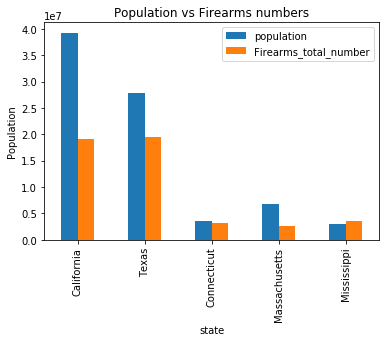

In [45]:
# Plot the relationship between population and firearm numbers
df2.plot(x='state', y=['population','Firearms_total_number'],kind='bar');
plt.title('Population vs Firearms numbers')
plt.xlabel('state')
plt.ylabel('Population')
plt.legend();

###### Usually number of population is higher than number of firearm except Mississipi - Where poverty is relatively the highest

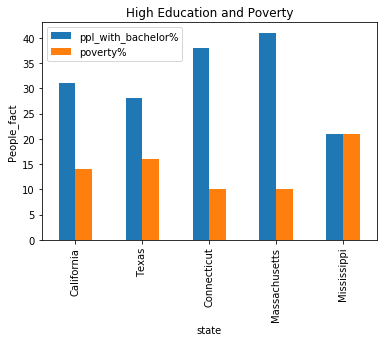

In [46]:
# Plot relationship between poverty and high education
df2.plot(x='state', y=['ppl_with_bachelor%','poverty%'],kind='bar');
plt.title('High Education and Poverty')
plt.xlabel('state')
plt.ylabel('People_fact')
plt.legend();

###### Very clear picture shows the more high education the lesser poverty

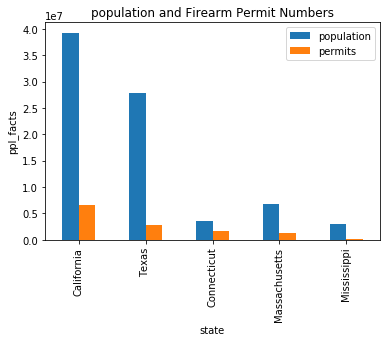

In [47]:
# Plot the relationship between population and number firearm permits
df2.plot(x='state', y=['population','permits'],kind='bar');
plt.title('population and Firearm Permit Numbers')
plt.xlabel('state')
plt.ylabel('ppl_facts')
plt.legend();

###### It is interesting to see that Connecticut has got a very high number of firearm permits comparing to its population – It is the highest in the average annual income per person

###### This will lead us to the next question about the number of firearm permits to the total number of firearms


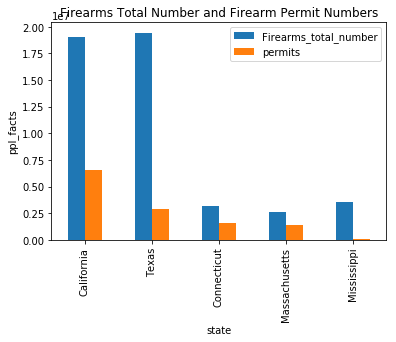

In [48]:
# Plot the relationship between number of firearn and number firearm permits
df2.plot(x='state', y=['Firearms_total_number','permits'],kind='bar');
plt.title('Firearms Total Number and Firearm Permit Numbers')
plt.xlabel('state')
plt.ylabel('ppl_facts')
plt.legend();

###### Mississippi has very little number of firearm permits comparing to the total number of firearams

###### Now I’m curious about the percentage of permits and firearms number so let’s plot it 


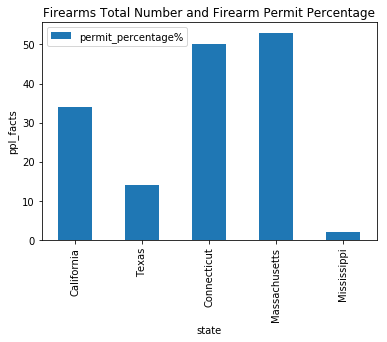

In [49]:
# Plot the percentage of number of firearms and number firearm permits
df2.plot(x='state', y=['permit_percentage%'],kind='bar');
plt.title('Firearms Total Number and Firearm Permit Percentage')
plt.xlabel('state')
plt.ylabel('ppl_facts')
plt.legend();

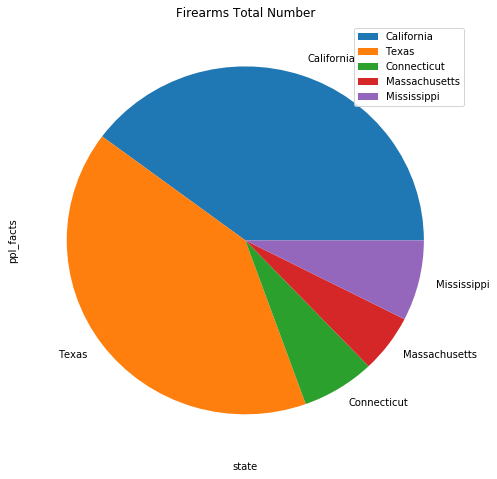

In [51]:
# Plot the number of firearms
df1.plot(x='state', y=['Firearms_total_number'],kind='pie',figsize=(8,8));
plt.title('Firearms Total Number')
plt.xlabel('state')
plt.ylabel('ppl_facts')
plt.legend();

In [52]:
df1

,population,Firearms_total_number,Firearms_Population_rate%,permits,permit_percentage%,white_ppl_rate%,black_ppl_rate%,asian_ppl_rate%,ppl_with_high_school%,ppl_with_bachelor%,ave_annual_income_usd,poverty%
California,39250017,19014063,48,6530543,34,73,7,15,82,31,30318,14
Texas,27862596,19435186,69,2857582,14,79,13,5,82,28,26999,16
Connecticut,3576452,3168126,88,1595270,50,81,12,5,90,38,38803,10
Massachusetts,6811779,2571321,37,1365225,53,82,9,7,90,41,36895,10
Mississippi,2988726,3576312,119,99945,2,59,38,1,82,21,21057,21


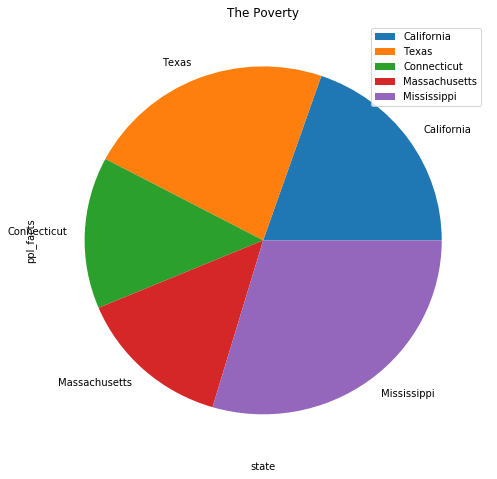

In [53]:
# Plot the percentage of poverty
df1.plot(x='state', y=['poverty%'],kind='pie',figsize=(8,8));
plt.title('The Poverty')
plt.xlabel('state')
plt.ylabel('ppl_facts')
plt.legend();

###### Not shocking. The better education and income the more firearm permits for people that have firearms. 
###### The percentages of people have firearm permits are 50% in Connecticut and 53% Massachusetts. While it is only 2% in Mississippi  



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### -  I’m shocked with percentage of people with high education level in USA generally when I see that most of the states have less than 25% of their population with bachelor’s degree and higher.Massachusetts where the best schools are still having only 41%. It is a very low number if you Compare it to Europe or even 3rd world countries. At same time more  than 78% of population have Highschool degrees and higher. Which means people are willing to go to school when it is available and Free or at least with reasonable cost. That lead us to the fact of these low numbers are due to the expensive high education system. 

### -  States with better income and high education level tend to grant more firearm permits which Leads the government to control gun and the easiness of tracing crimes in sociaties

### -  Mississippi where the highest poverty so it has 21% of people in poverty at the same time it has 119% of firearms over population. So, the number of firearms is higher than populations. 

## We can use these data to improve our higher education, income, reduce poverty, and tackle crime levels


### Limitation: I believe there are some limitations in the data sheets such as 
-	Data are on state level which sometimes might not be very useful depending on having major cities and suburbs. The distribution won’t do justice as mush as if it was city level data. Like we see a lot of poverty in suburbs and small towns while higher income and education in big cities. 
-	It would be good to add crime level in terms of counts and rates to correlate to poverty, race, education, etc. 
-	Probably adding columns of how many firearm permit applications rejected
